In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

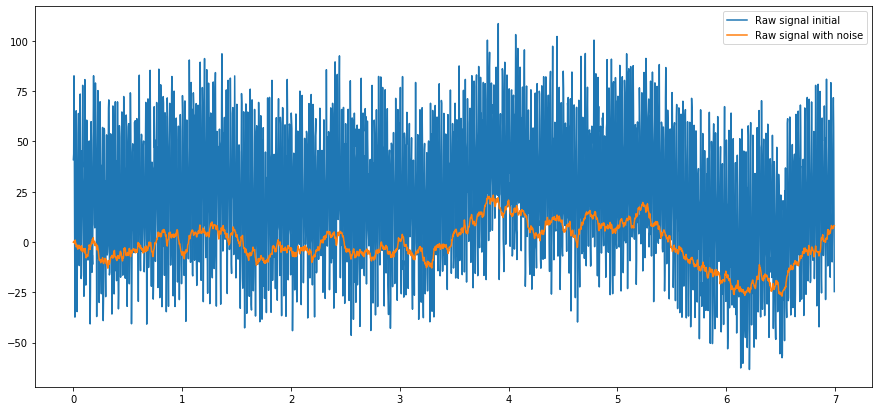

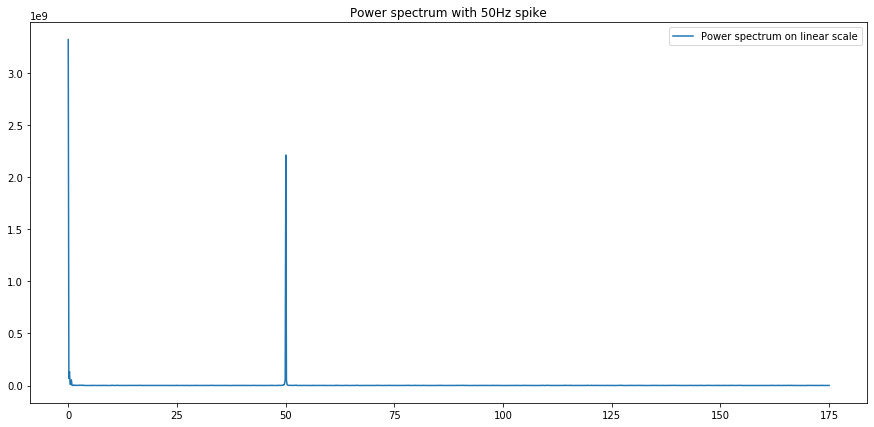

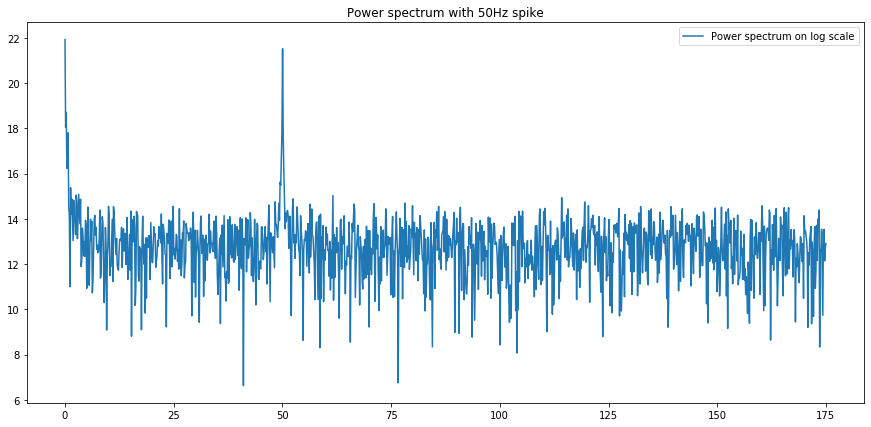

In [2]:
# Generation of signal

sample_frequency = 350
nyquist_frequency = sample_frequency / 2
time_axis = np.arange(0, sample_frequency * 7 - 1) / sample_frequency
n_signal = len(time_axis)

raw_signal_initial = np.cumsum(np.random.randn(n_signal))
# add noise with 50 HZ spike 
raw_signal = raw_signal_initial + 50 * np.random.rand(n_signal) + 40 * np.sin(2 * np.pi * 50 * time_axis)
plt.figure(figsize=(15, 7))
plt.plot(time_axis, raw_signal, label='Raw signal initial')
plt.plot(time_axis, raw_signal_initial, label='Raw signal with noise')
plt.legend()
plt.show()

raw_signal_power = abs(np.fft.fft(raw_signal)) ** 2
hz_axis_signal = np.linspace(0, nyquist_frequency, int(np.floor((n_signal / 2) + 1)))

plt.figure(figsize=(15, 7))
# Power is presented on log scale, because this way we can see both small and large amplitudes
plt.plot(hz_axis_signal, raw_signal_power[:len(hz_axis_signal)], label='Power spectrum on linear scale')
plt.title('Power spectrum with 50Hz spike')
plt.legend()
plt.show()

plt.figure(figsize=(15, 7))
# Power is presented on log scale, because this way we can see both small and large amplitudes
plt.plot(hz_axis_signal, np.log(raw_signal_power[:len(hz_axis_signal)]), label='Power spectrum on log scale')
plt.title('Power spectrum with 50Hz spike')
plt.legend()
plt.show()


c:\users\viacheslav_bobrov\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


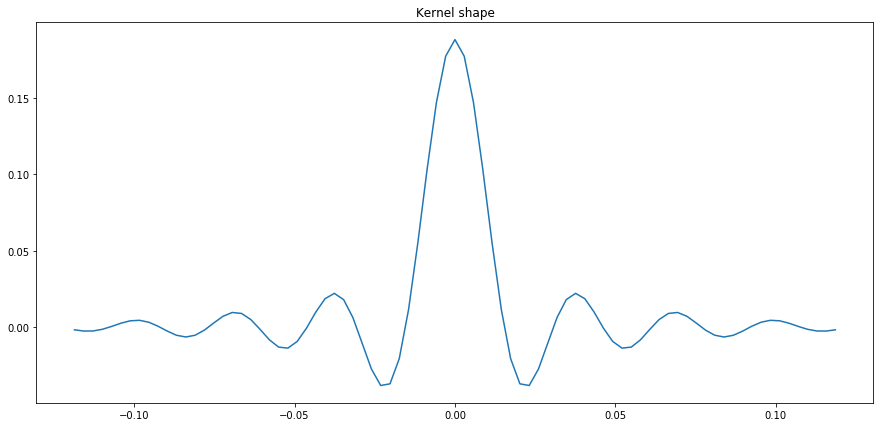

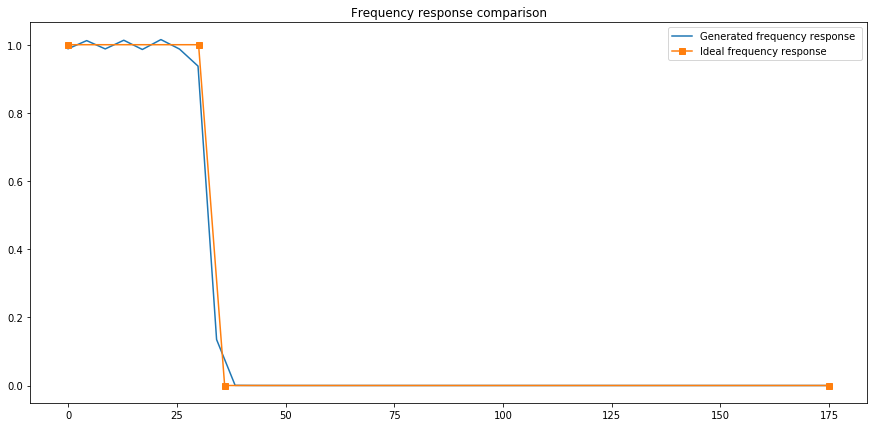

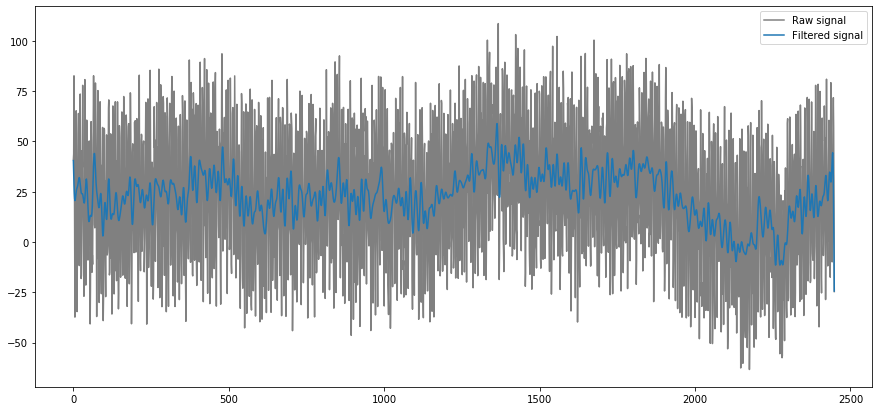

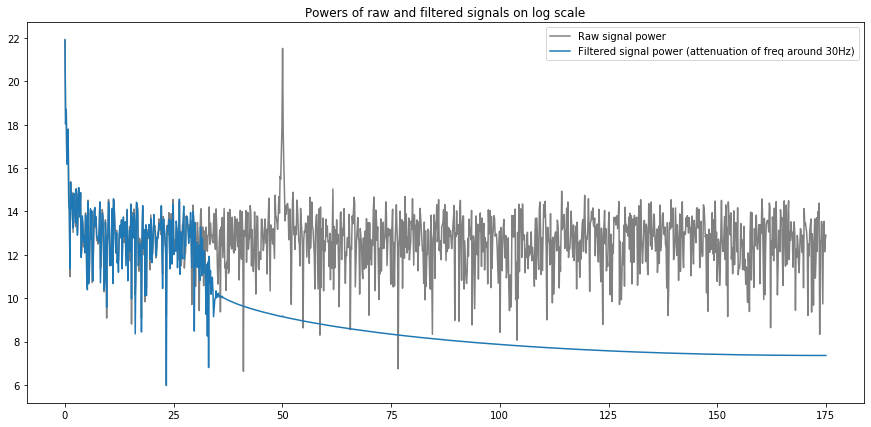

In [7]:
frequency_cutoff = 30
transition_window = 0.2
order = round(7 * sample_frequency / frequency_cutoff) + 1  # odd

shape = [1, 1, 0, 0]
frequency_range = [0, frequency_cutoff, frequency_cutoff * (1 + transition_window), nyquist_frequency]
frequency_range = np.asarray(frequency_range) / nyquist_frequency

filtering_kernel = signal.firls(order, frequency_range, shape)
filtering_kernel_power = abs(np.fft.fft(filtering_kernel)) ** 2
hz_axis = np.linspace(0, nyquist_frequency, np.floor(len(filtering_kernel) / 2) + 1)

plt.figure(figsize=(15, 7))
plt.plot(np.linspace(-order / 2, order / 2, len(filtering_kernel)) / sample_frequency, filtering_kernel)
plt.title('Kernel shape')
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(hz_axis, filtering_kernel_power[:len(hz_axis)], label='Generated frequency response ')
plt.plot(frequency_range * nyquist_frequency, shape, 's-', label='Ideal frequency response ')
plt.legend()
plt.title('Frequency response comparison')
plt.show()

filtered_signal = signal.filtfilt(filtering_kernel, 1, raw_signal)
plt.figure(figsize=(15, 7))
plt.plot(raw_signal, 'grey', label='Raw signal')
plt.plot(filtered_signal, label='Filtered signal')
plt.legend()
plt.show()

filtered_signal_power = abs(np.fft.fft(filtered_signal)) ** 2
plt.figure(figsize=(15, 7))
plt.plot(hz_axis_signal, np.log(raw_signal_power[:len(hz_axis_signal)]), 'grey', label='Raw signal power')
plt.plot(hz_axis_signal, np.log(filtered_signal_power)[:len(hz_axis_signal)], 
         label='Filtered signal power (attenuation of freq around {0}Hz)'.format(frequency_cutoff))
plt.legend()
plt.title('Powers of raw and filtered signals on log scale')
plt.show()
